In [3]:
import pandas as pd

# Specify the data type for column 7 as a string
dtype_options = {"ColumnName7": str}

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame, specifying the data types and low_memory=False
baltimore911_df = pd.read_csv(file_path, dtype=dtype_options, low_memory=False)

# Get the total number of rows/instances in the dataset
total_rows = len(baltimore911_df)

# Print the total number of rows
print("Total number of rows/instances in Baltimore911 dataset:", total_rows)

Total number of rows/instances in Baltimore911 dataset: 292761


In [4]:
import pandas as pd

# Specify the data type for column 7 as a string
dtype_options = {"ColumnName7": str}

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame, specifying the data types and low_memory=False
baltimore911_df = pd.read_csv(file_path, dtype=dtype_options, low_memory=False)

# Get the total number of columns (features) in the dataset
total_columns = len(baltimore911_df.columns)

# Print the total number of columns
print("Total number of call features/columns in Baltimore911 dataset:", total_columns)

Total number of call features/columns in Baltimore911 dataset: 16


In [5]:
import pandas as pd

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame, specifying low_memory=False
baltimore911_df = pd.read_csv(file_path, low_memory=False)

# Create dictionaries to categorize columns
numeric_columns = {}
symbolic_columns = {}
temporal_columns = {}
spatial_columns = {}

# Define the threshold for considering a column as numeric
numeric_threshold = 10

# Loop through columns and categorize them
for column in baltimore911_df.columns:
    column_data = baltimore911_df[column]
    unique_values = column_data.nunique()
    data_type = str(column_data.dtype)
    
    if unique_values <= numeric_threshold:
        symbolic_columns[column] = data_type + " (Discrete)"
    else:
        try:
            pd.to_datetime(column_data, errors='raise')  # Check if it's a date/time column
            temporal_columns[column] = "Temporal"
        except (ValueError, TypeError):
            symbolic_columns[column] = data_type + " (Discrete)"

# Print the categorization of columns
print("Column Categorization:")
print("=======================")
print("Numeric/Continuous Columns:")
for column, data_type in numeric_columns.items():
    print(f"{column}: {data_type}")
print("\nSymbolic/Discrete Columns:")
for column, data_type in symbolic_columns.items():
    print(f"{column}: {data_type}")
print("\nTemporal Columns:")
for column in temporal_columns.keys():
    print(column, ": Temporal")

Column Categorization:
Numeric/Continuous Columns:

Symbolic/Discrete Columns:
CrimeCode: object (Discrete)
Location: object (Discrete)
Description: object (Discrete)
Inside/Outside: object (Discrete)
Weapon: object (Discrete)
Post: object (Discrete)
District: object (Discrete)
Neighborhood: object (Discrete)
Location 1: float64 (Discrete)
Premise: object (Discrete)
vri_name1: object (Discrete)
Total Incidents: int64 (Discrete)

Temporal Columns:
CrimeDate : Temporal
CrimeTime : Temporal
Longitude : Temporal
Latitude : Temporal


In [6]:
import pandas as pd

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame, specifying low_memory=False
baltimore911_df = pd.read_csv(file_path, low_memory=False)

# Create a list to store the names of discrete attributes
discrete_attributes = []

# Create a dictionary to store the results
discrete_results = {}

# Define the threshold for considering a column as discrete (you can adjust this as needed)
numeric_threshold = 10

# Loop through columns and categorize them
for column in baltimore911_df.columns:
    column_data = baltimore911_df[column]
    unique_values = column_data.nunique()
    data_type = str(column_data.dtype)
    
    if unique_values <= numeric_threshold:
        discrete_attributes.append(column)
        value_counts = column_data.value_counts()
        top_values = value_counts.head(3)
        discrete_results[column] = {
            "Total Unique Values": unique_values,
            "Top 3 Values with Counts": top_values.to_dict(),
        }

# Print results for discrete attributes
print("Discrete Attribute Information:")
print("==============================")
for attribute in discrete_attributes:
    print(f"Attribute: {attribute}")
    results = discrete_results[attribute]
    print(f"Total Unique Values: {results['Total Unique Values']}")
    print("Top 3 Values with Counts:")
    for value, count in results["Top 3 Values with Counts"].items():
        print(f"{value}: {count}")
    print("\n")

Discrete Attribute Information:
Attribute: Inside/Outside
Total Unique Values: 4
Top 3 Values with Counts:
O: 128776
I: 124454
Outside: 5113


Attribute: Weapon
Total Unique Values: 5
Top 3 Values with Counts:
FIREARM: 29036
OTHER: 17313
KNIFE: 10023


Attribute: District
Total Unique Values: 10
Top 3 Values with Counts:
NORTHEAST: 44207
SOUTHEAST: 41816
CENTRAL: 33508


Attribute: Location 1
Total Unique Values: 0
Top 3 Values with Counts:


Attribute: vri_name1
Total Unique Values: 8
Top 3 Values with Counts:
Tri-District: 6607
Western: 5825
Central: 5420


Attribute: Total Incidents
Total Unique Values: 1
Top 3 Values with Counts:
1: 292761




In [7]:
import pandas as pd

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame, specifying low_memory=False
baltimore911_df = pd.read_csv(file_path, low_memory=False)

# Calculate the percentage of missing values for each row
missing_percentage_per_row = baltimore911_df.isnull().mean(axis=1) * 100

# Calculate the overall percentage of missing values across all rows
overall_missing_percentage = missing_percentage_per_row.mean()

# Print the overall percentage of missing values
print(f"Overall Percentage of Missing Values: {overall_missing_percentage:.2f}%")

Overall Percentage of Missing Values: 18.52%


In [8]:
import pandas as pd

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame
baltimore911_df = pd.read_csv(file_path, low_memory=False)

# Specify the columns you want to include in the dataset profile
selected_columns = [
    "CrimeDate", "CrimeTime", "CrimeCode", "Location", "Description", 
    "Inside/Outside", "Weapon", "Post", "District", "Neighborhood", 
    "Longitude", "Latitude", "Location 1", "Premise", "vri_name1", "Total Incidents"
]

# Create a summary DataFrame for the selected columns
profile_df = baltimore911_df[selected_columns]

# Generate summary statistics for numeric columns (Longitude, Latitude)
numeric_summary = profile_df[["Longitude", "Latitude"]].describe()

# Calculate the number of unique values for each non-numeric column
unique_counts = profile_df.select_dtypes(exclude=['number']).nunique().rename("Unique Values")

# Combine the summary statistics and unique value counts
profile_summary = pd.concat([numeric_summary, unique_counts])

# Print the dataset profile summary
print(profile_summary)

                    Longitude       Latitude        0
count           291126.000000  291126.000000      NaN
mean               -76.617452      39.306746      NaN
std                  0.043734       0.029658      NaN
min                -81.529189      37.577262      NaN
25%                -76.649094      39.288186      NaN
50%                -76.613977      39.302672      NaN
75%                -76.587080      39.326965      NaN
max                -76.383228      39.661332      NaN
CrimeDate                 NaN            NaN   2300.0
CrimeTime                 NaN            NaN   1475.0
CrimeCode                 NaN            NaN     81.0
Location                  NaN            NaN  27064.0
Description               NaN            NaN     14.0
Inside/Outside            NaN            NaN      4.0
Weapon                    NaN            NaN      5.0
Post                      NaN            NaN    133.0
District                  NaN            NaN     10.0
Neighborhood              Na

In [9]:
import pandas as pd

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame
baltimore911_df = pd.read_csv(file_path, low_memory=False)

# Specify the columns you want to clean
selected_columns = [
    "CrimeDate", "CrimeTime", "CrimeCode", "Location", "Description", 
    "Inside/Outside", "Weapon", "Post", "District", "Neighborhood", 
    "Longitude", "Latitude", "Location 1", "Premise", "vri_name1", "Total Incidents"
]

# Step 1: Handling Missing Values
baltimore911_df[selected_columns] = baltimore911_df[selected_columns].fillna("")

# Step 2: Removing Duplicates
baltimore911_df.drop_duplicates(subset=selected_columns, inplace=True)

# Step 3: Data Type Conversion (if needed)
# Example: Convert "CrimeDate" to datetime
baltimore911_df["CrimeDate"] = pd.to_datetime(baltimore911_df["CrimeDate"], errors="coerce")


In [10]:
missing_values = baltimore911_df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values remaining in the dataset.")

No missing values remaining in the dataset.


In [11]:
duplicates = baltimore911_df.duplicated().sum()
if duplicates == 0:
    print("No duplicate rows remaining in the dataset.")

No duplicate rows remaining in the dataset.


In [12]:
if pd.api.types.is_datetime64_any_dtype(baltimore911_df["CrimeDate"]):
    print("Date column (CrimeDate) is in datetime format.")

Date column (CrimeDate) is in datetime format.


In [13]:
print(baltimore911_df.head())

   CrimeDate CrimeTime CrimeCode            Location          Description  \
0 2020-02-08   2:18:00        5D  1700 CLIFTVIEW AVE             BURGLARY   
1 2020-02-08   6:00:00        6G   700 N STREEPER ST              LARCENY   
2 2020-02-08   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
4 2020-02-08  17:30:00        5A    1600 E OLIVER ST             BURGLARY   
5 2020-02-08  19:00:00        5A    1400 AISQUITH ST             BURGLARY   

  Inside/Outside   Weapon Post District     Neighborhood  Longitude  \
0              I           312  EASTERN      DARLEY PARK  -76.59387   
1              I           333  EASTERN  MADISON EASTEND -76.577425   
2              I  FIREARM  314  EASTERN           OLIVER -76.594992   
4              I           314  EASTERN           OLIVER -76.595946   
5              I                EASTERN                               

    Latitude Location 1             Premise  vri_name1  Total Incidents  
0  39.315341             GROCERY/CON

In [14]:
missing_values = baltimore911_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CrimeDate          0
CrimeTime          0
CrimeCode          0
Location           0
Description        0
Inside/Outside     0
Weapon             0
Post               0
District           0
Neighborhood       0
Longitude          0
Latitude           0
Location 1         0
Premise            0
vri_name1          0
Total Incidents    0
dtype: int64


In [15]:
duplicate_rows = baltimore911_df[selected_columns].duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}")

Number of Duplicate Rows: 0


In [16]:
data_types = baltimore911_df[selected_columns].dtypes
print("Data Types:")
print(data_types)

Data Types:
CrimeDate          datetime64[ns]
CrimeTime                  object
CrimeCode                  object
Location                   object
Description                object
Inside/Outside             object
Weapon                     object
Post                       object
District                   object
Neighborhood               object
Longitude                  object
Latitude                   object
Location 1                 object
Premise                    object
vri_name1                  object
Total Incidents             int64
dtype: object


In [17]:
sample_data = baltimore911_df[selected_columns].sample(5)  # Adjust the sample size as needed
print("Sample Data:")
print(sample_data)

Sample Data:
        CrimeDate CrimeTime CrimeCode              Location     Description  \
155589 2016-11-24  20:30:00        4E    500 MILLINGTON AVE  COMMON ASSAULT   
112537 2017-09-22  21:40:00        4C   2500 W BALTIMORE ST    AGG. ASSAULT   
67530  2018-08-28  12:43:00        9S       500 N CURLEY ST        SHOOTING   
31785  2019-05-31  23:15:00        4E        900 W PRATT ST  COMMON ASSAULT   
166687 2016-09-11  20:27:00        4E  2500 EDGECOMBE CIR N  COMMON ASSAULT   

       Inside/Outside   Weapon Post   District  Neighborhood  Longitude  \
155589              O           834  SOUTHWEST     MILL HILL -76.656439   
112537              I    OTHER  835  SOUTHWEST  SHIPLEY HILL -76.657713   
67530         Outside  FIREARM  224  SOUTHEAST        CANTON -76.575858   
31785               I           931   SOUTHERN  HOLLINS PARK  -76.63331   
166687              I           532   NORTHERN      PARKLANE -76.658766   

         Latitude Location 1            Premise vri_name1  To

In [18]:
summary_stats = baltimore911_df[selected_columns].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Total Incidents
count         281319.0
mean               1.0
std                0.0
min                1.0
25%                1.0
50%                1.0
75%                1.0
max                1.0


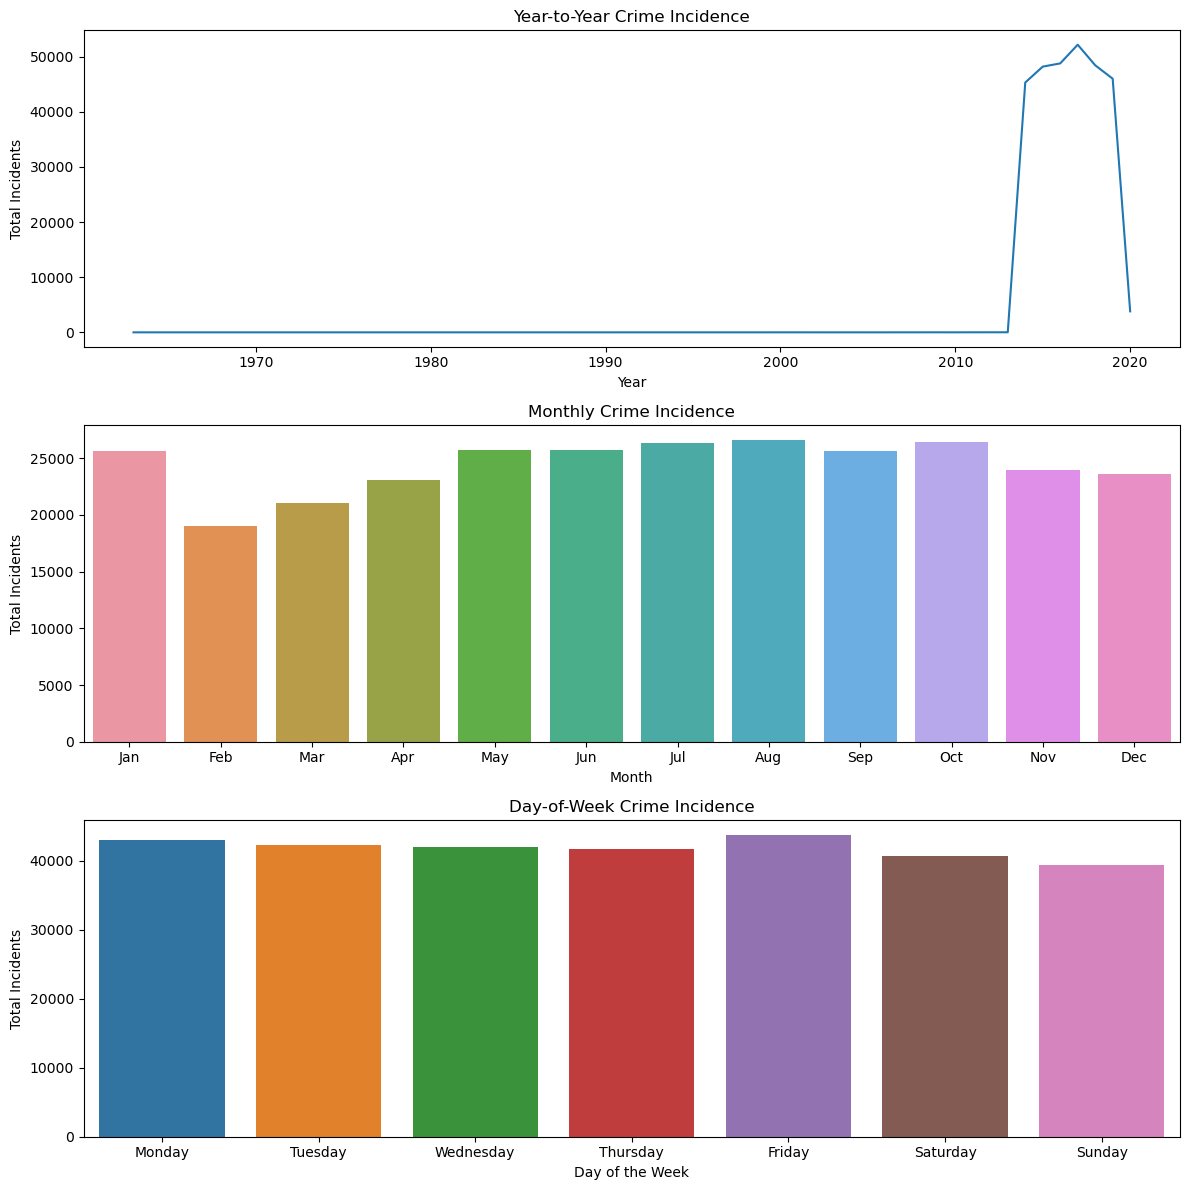

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame
baltimore911_df = pd.read_csv(file_path, low_memory=False)

# Ensure the "CrimeDate" column is in datetime format
baltimore911_df['CrimeDate'] = pd.to_datetime(baltimore911_df['CrimeDate'], errors='coerce')

# Create a new DataFrame with date-related information
date_info = baltimore911_df[['CrimeDate', 'Total Incidents']].copy()
date_info['Year'] = date_info['CrimeDate'].dt.year
date_info['Month'] = date_info['CrimeDate'].dt.month
date_info['DayOfWeek'] = date_info['CrimeDate'].dt.dayofweek  # Monday is 0, Sunday is 6

# Group data by year, month, and day of the week, and calculate total incidents
yearly_data = date_info.groupby('Year')['Total Incidents'].sum()
monthly_data = date_info.groupby('Month')['Total Incidents'].sum()
day_of_week_data = date_info.groupby('DayOfWeek')['Total Incidents'].sum()

# Create subplots for year-to-year, monthly, and day-of-week plots
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Year-to-Year Plot
sns.lineplot(x=yearly_data.index, y=yearly_data.values, ax=axes[0])
axes[0].set_title('Year-to-Year Crime Incidence')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Incidents')

# Monthly Plot
sns.barplot(x=monthly_data.index, y=monthly_data.values, ax=axes[1])
axes[1].set_title('Monthly Crime Incidence')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Incidents')
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Day-of-Week Plot
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=day_of_week_data.index, y=day_of_week_data.values, ax=axes[2])
axes[2].set_title('Day-of-Week Crime Incidence')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Total Incidents')
axes[2].set_xticklabels(day_names)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

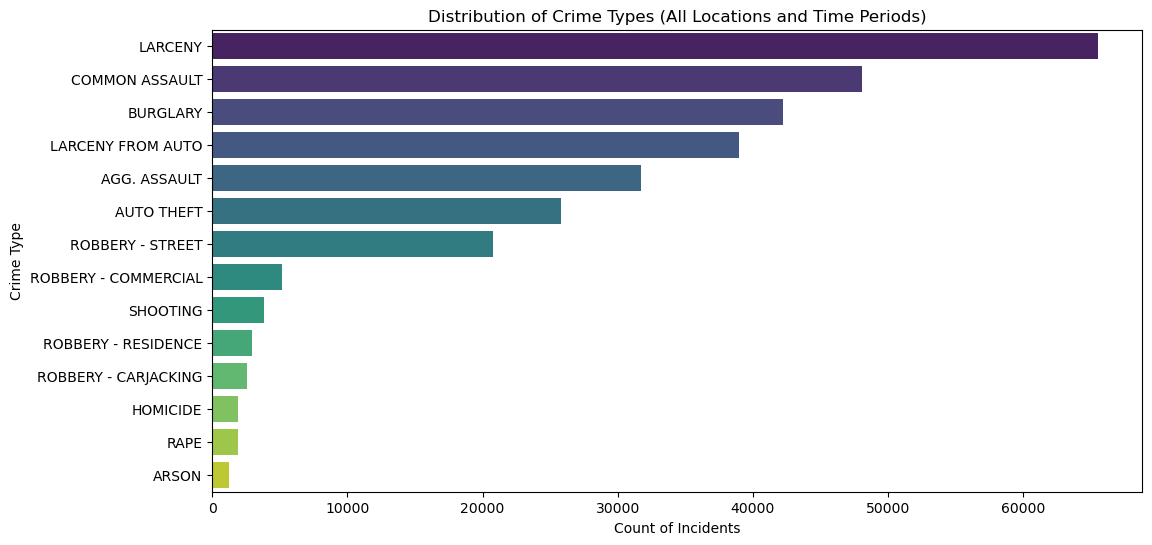

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame
baltimore911_df = pd.read_csv(file_path, low_memory=False)

# Group data by crime type and calculate the count of each crime type
crime_type_counts = baltimore911_df['Description'].value_counts()

# Filter out low-frequency crime types for better visualization (adjust threshold as needed)
min_count_threshold = 500
filtered_crime_types = crime_type_counts[crime_type_counts >= min_count_threshold]

# Create a bar plot to visualize the distribution of crime types
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_crime_types.values, y=filtered_crime_types.index, palette='viridis')

# Customize plot labels and title
plt.xlabel('Count of Incidents')
plt.ylabel('Crime Type')
plt.title('Distribution of Crime Types (All Locations and Time Periods)')

# Show the plot
plt.show()

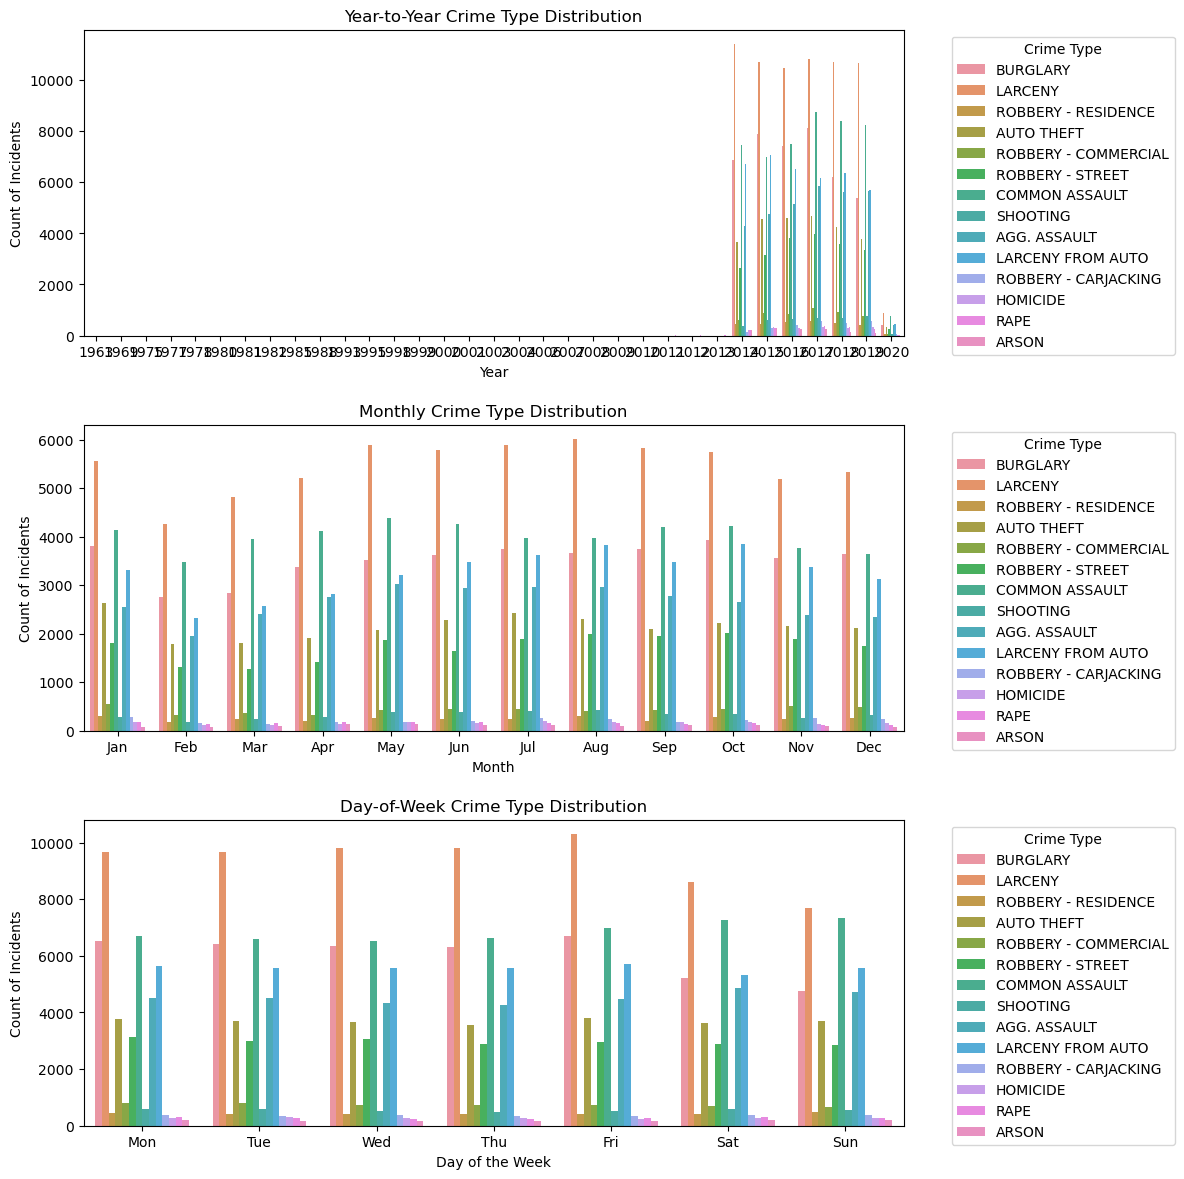

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame
baltimore911_df = pd.read_csv(file_path, low_memory=False)

# Ensure the "CrimeDate" column is in datetime format
baltimore911_df['CrimeDate'] = pd.to_datetime(baltimore911_df['CrimeDate'], errors='coerce')

# Extract year, month, and day of the week from the "CrimeDate" column
baltimore911_df['Year'] = baltimore911_df['CrimeDate'].dt.year
baltimore911_df['Month'] = baltimore911_df['CrimeDate'].dt.month
baltimore911_df['DayOfWeek'] = baltimore911_df['CrimeDate'].dt.dayofweek  # Monday is 0, Sunday is 6

# Create subplots for year-to-year, month-to-month, and day-of-week plots
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Year-to-Year Crime Type Distribution
sns.countplot(x='Year', hue='Description', data=baltimore911_df, ax=axes[0])
axes[0].set_title('Year-to-Year Crime Type Distribution')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count of Incidents')
axes[0].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Monthly Crime Type Distribution
sns.countplot(x='Month', hue='Description', data=baltimore911_df, ax=axes[1])
axes[1].set_title('Monthly Crime Type Distribution')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count of Incidents')
axes[1].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Day-of-Week Crime Type Distribution
sns.countplot(x='DayOfWeek', hue='Description', data=baltimore911_df, ax=axes[2])
axes[2].set_title('Day-of-Week Crime Type Distribution')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Count of Incidents')
axes[2].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Replace "Baltimore911.csv" with the actual file path if it's located elsewhere
file_path = ("C:/Users/savar/Downloads/Baltimore911.csv")

# Read the dataset into a pandas DataFrame
baltimore911_df = pd.read_csv(file_path, low_memory=False)

# Ensure the "CrimeDate" column is in datetime format
baltimore911_df['CrimeDate'] = pd.to_datetime(baltimore911_df['CrimeDate'], errors='coerce')

baltimore911_df.head(3)

C:\Users\savar\AppData\Local\Temp\ipykernel_19588\2770889265.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\savar\AppData\Local\Temp\ipykernel_19588\2770889265.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,2020-02-08,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,2020-02-08,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,2020-02-08,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1


In [26]:
!pip install  skimpy

In [24]:
from skimpy import skim

skim(baltimore911_df)

C:\Users\savar\anaconda3\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 292761 │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 16     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA       ┃ NA %   ┃ mean   ┃ sd      ┃ p0    ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Longitude            │     1635 │   0.56 │    -77 │   0.044 │   -82 │  -77 │  -77 │  -77 │   -76 │      ▇  │  │
│ │ Latitude             │     1635 │   0.56 │     39 │    0.03 │    38 │   39 │   39 │   39 │    40 │     ▇▅  │  │
│ │ Location 1           │   292761 │    100 │    nan │     nan │   nan │  nan │  nan │  nan │   nan │         │  │
│ │ Total Incidents      │        0 │      0 │      1 │       0 │     1 │    1 │    1 │    1 │     1 │     ▇   │  │
│ └──────────────────────┴──────────┴────────┴────────┴─────────┴───────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ CrimeDate              │      0 │         0 │     1963-10-30      │     2020-02-08      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA           ┃ NA %        ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CrimeTime                   │           26 │        0.01 │                        1 │               292735 │  │
│ │ CrimeCode                   │            0 │           0 │                        1 │               292761 │  │
│ │ Location                    │         1336 │        0.46 │                      3.4 │              1000942 │  │
│ │ Description                 │            0 │           0 │                      1.8 │               539328 │  │
│ │ Inside/Outside              │        33760 │       11.53 │                     0.88 │               259001 │  │
│ │ Weapon                      │       231229 │       7